In [1]:
from scipy.io import loadmat
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hdf5storage

In [2]:
# Import signal
datas = hdf5storage.loadmat('../data/ID08_56to64_all.mat')
info = loadmat('../data/ID08_info.mat')
datas = datas['EEG']
fs = float(info['fs'])

In [5]:
# Parameters
nperseg = int(2*60*fs)
noverlap = int(1*60*fs)
f_band = [0.5, 4]  # Hz
data = datas[0, :]
print(data.shape[0]/fs/60)

540.0


(0, 30)

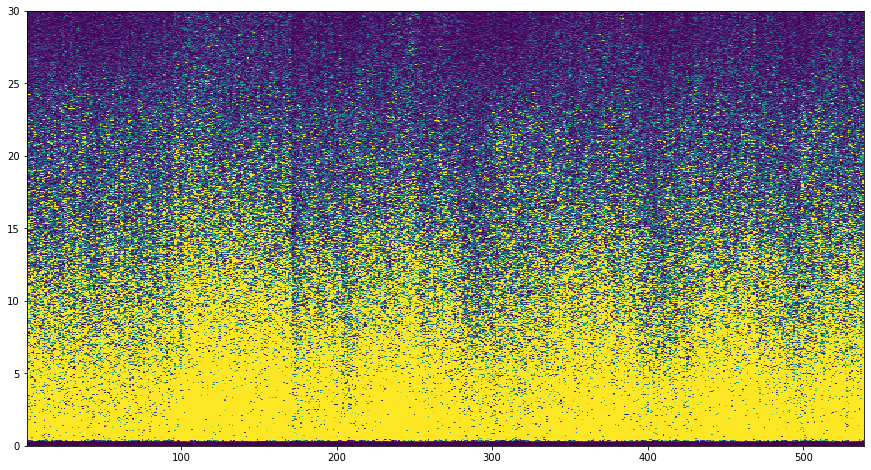

In [6]:
f, t, Sxx = signal.spectrogram(data, fs, nperseg=nperseg, noverlap=noverlap, scaling='density')

(0, 30)

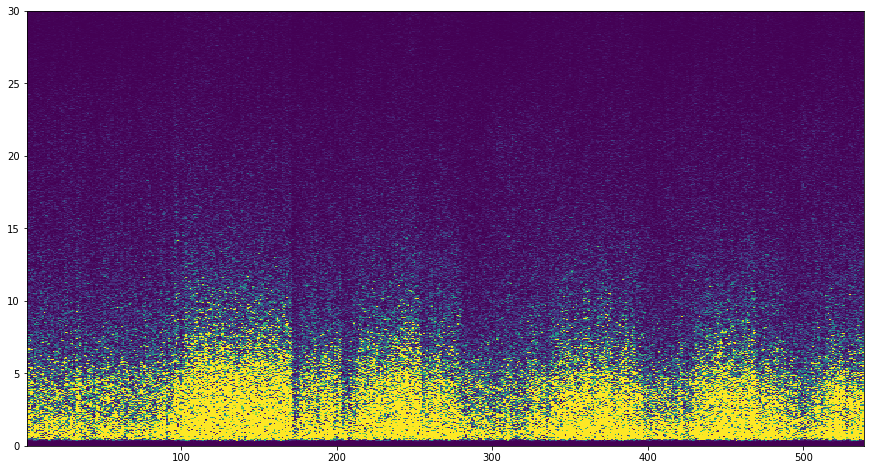

In [9]:
plt.figure(figsize=(15, 8))
plt.pcolormesh(t/60, f, Sxx, vmax=200)
plt.ylim(0, 30)

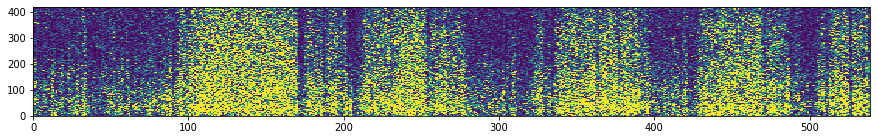

In [12]:
Sxx_band = Sxx[int(f_band[0] * Sxx.shape[0] / f[-1]):int(f_band[1] * Sxx.shape[0] / f[-1]), :]
plt.figure(figsize=(15, 2))
plt.pcolor(Sxx_band, vmax=1000)

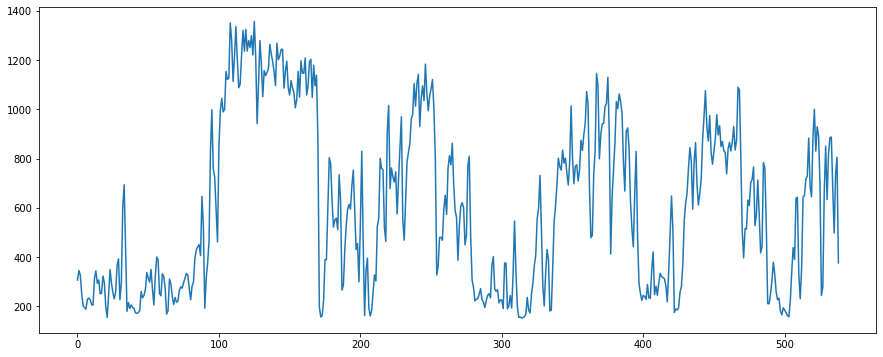

In [13]:
swa = np.mean(Sxx_band, axis=0)
plt.figure(figsize=(15, 6))
plt.plot(swa)

In [15]:
fs

1024.0

In [ ]:
d